In [ ]:
# Data-Driven Carbon Footprint Analytics  
# ##CO₂ Emissions Per Capita Prediction Using Machine Learning

# This notebook presents a data-driven analysis of global CO₂ emissions,
# with a focus on **carbon intensity (CO₂ per capita)**. Using publicly
# available data from *Our World in Data*, we explore key energy,
# economic, and demographic drivers of emissions and build predictive
# machine learning models to quantify their impact.

# The objective is to:
# - Understand major contributors to carbon intensity
# - Build accurate predictive models
# - Interpret results in a physically and economically meaningful way

In [ ]:
# ## Dataset Description

# - **Source**: Our World in Data (OWID) – CO₂ and Greenhouse Gas Emissions
# - **Coverage**: Global, multi-country, multi-year
# - **Key variables**:
#   - Energy consumption per capita
#   - Fossil fuel-specific CO₂ emissions
#   - GDP and population
#   - CO₂ emissions per capita (target)

# The dataset contains multiple derived indicators. Only variables
# relevant to carbon intensity modeling are retained for analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("owid-co2-data.csv")

In [4]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(50411, 79)

In [6]:
df.isnull().sum()

country                                          0
year                                             0
iso_code                                      7931
population                                    9244
gdp                                          35160
cement_co2                                   21238
cement_co2_per_capita                        24763
co2                                          21027
co2_growth_abs                               23195
co2_growth_prct                              24172
co2_including_luc                            26615
co2_including_luc_growth_abs                 26915
co2_including_luc_growth_prct                26915
co2_including_luc_per_capita                 26654
co2_including_luc_per_gdp                    33621
co2_including_luc_per_unit_energy            40391
co2_per_capita                               23902
co2_per_gdp                                  32883
co2_per_unit_energy                          39712
coal_co2                       

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(50411, 79)

In [10]:
df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50411.000000,4.116700e+04,1.525100e+04,29173.000000,25648.000000,29384.000000,27216.000000,26239.000000,23796.000000,23496.000000,23496.000000,23757.000000,16790.000000,10020.000000,26509.000000,17528.000000,10699.000000,21925.000000,21314.000000,5053.000000,4643.000000,4448.000000,29151.000000,2.756300e+04,2.379600e+04,21925.000000,16111.000000,18147.000000,37450.000000,25458.000000,3254.000000,10459.000000,7787.000000,16174.000000,14910.000000,18147.000000,17446.000000,35842.000000,36179.000000,37450.000000,36635.000000,38150.000000,36179.000000,38500.000000,36439.000000,25459.000000,24722.000000,2659.000000,3254.000000,10503.000000,22270.000000,27563.000000,23796.000000,21925.000000,22270.000000,27563.000000,23796.000000,21925.000000,11089.000000,15167.000000,37450.000000,23833.000000,2170.000000,11089.000000,15167.000000,37450.000000,23833.000000,2170.000000,41238.000000,38280.000000,41238.000000,41238.000000,3.828000e+04,38150.000000,37813.000000,4712.000000,4712.000000
mean,1920.349249,6.017453e+07,3.300495e+11,7.890110,0.060013,420.227031,6.268844,42.598225,544.144590,7.483698,4.132342,7.115215,2.328424,1.349434,3.821372,0.397679,0.252191,185.496063,1.285325,1318.129612,6.463378,0.349924,196.486345,1.249223e+04,2.790247e+04,9311.023974,177.231150,1876.820098,9998.375654,3777.605155,417.861565,24325.863595,1.671655,5.854643,0.270544,74.840366,0.797031,3.079828,7.716633,124.752927,3.905388,95.277708,1.741394,25.424758,0.444566,115.307626,2.192688,0.082215,20.116568,2480.146346,3.002811,5.369870,3.457516,6.791734,2.995656,5.500656,3.321961,6.974366,3.043674,4.104544,2.559366,3.351796,7.053675,3.126380,4.195695,2.439717,3.333344,7.190606,2.272248,0.002913,0.008048,0.011256,5.432353e-04,490.799605,310.521462,-6.986785,21.468644
std,65.859123,3.308433e+08,3.086383e+12,62.988172,0.123563,1972.092036,62.199549,1721.913018,2273.281695,99.512520,166.964358,8.921279,5.626877,6.711235,14.312865,0.754062,0.317044,855.418421,2.351091,3904.104961,6.852516,0.247281,1495.918346,7.312143e+04,1.269563e+05,43499.981368,926.732658,11756.922690,46043.141429,24886.829186,1317.317552,32302.447509,1.630301,26.749902,2.995053,397.296982,2.805143,7.785478,11.276871,519.818809,9.106627,434.707031,3.832718,129.896893,0.799294,646.556647,13.948773,0.079725,55.644705,11449.335320,13.389959,18.734888,11.709721,20.969459,13

In [11]:
df.isnull().sum().sum()

2105679

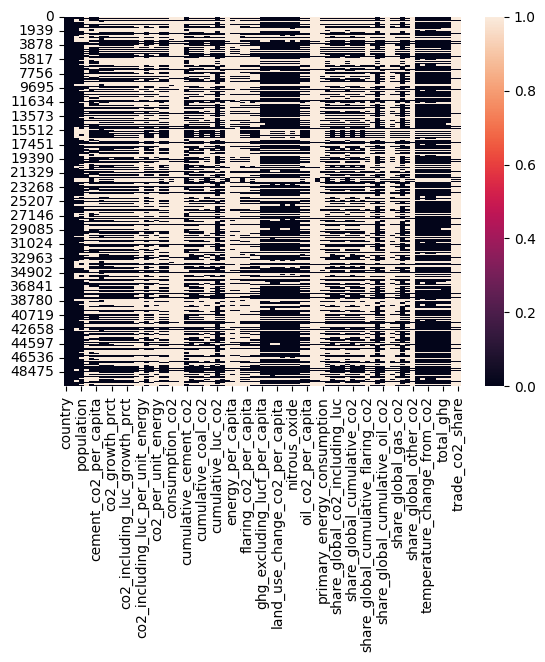

In [12]:
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50411 entries, 0 to 50410
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50411 non-null  object 
 1   year                                       50411 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

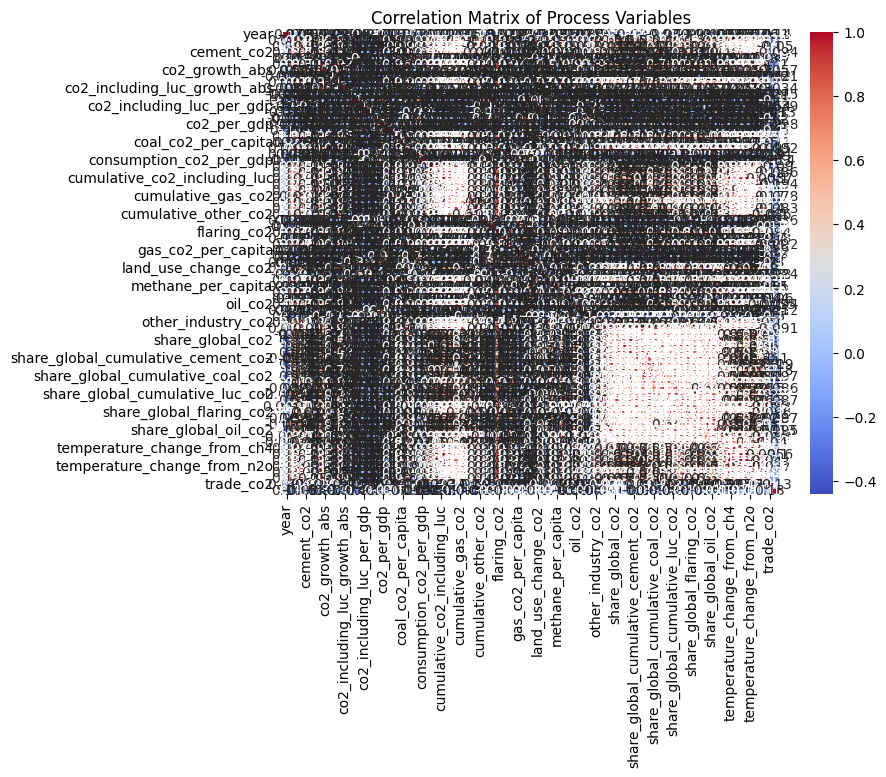

In [14]:
corr = df.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Process Variables")
plt.show()

In [15]:
missing_frac = df.isna().mean().sort_values(ascending=False)
missing_frac.head(79)

share_global_cumulative_other_co2            0.956954
share_global_other_co2                       0.956954
other_co2_per_capita                         0.947254
other_industry_co2                           0.935451
cumulative_other_co2                         0.935451
consumption_co2_per_gdp                      0.911765
consumption_co2_per_capita                   0.907897
trade_co2                                    0.906528
trade_co2_share                              0.906528
consumption_co2                              0.899764
energy_per_gdp                               0.845530
co2_including_luc_per_unit_energy            0.801234
energy_per_capita                            0.792525
primary_energy_consumption                   0.791653
co2_per_unit_energy                          0.787765
share_global_cumulative_flaring_co2          0.780028
share_global_flaring_co2                     0.780028
flaring_co2_per_capita                       0.704231
share_global_cumulative_gas_

In [16]:
df.select_dtypes(include="number").corr()['co2_per_capita'].sort_values(ascending=False)

co2_per_capita                               1.000000
oil_co2_per_capita                           0.956587
ghg_excluding_lucf_per_capita                0.899589
energy_per_capita                            0.747595
consumption_co2_per_capita                   0.713141
ghg_per_capita                               0.628671
co2_including_luc_per_capita                 0.623903
co2_per_gdp                                  0.590643
other_co2_per_capita                         0.547771
consumption_co2_per_gdp                      0.502682
energy_per_gdp                               0.459552
methane_per_capita                           0.379100
gas_co2_per_capita                           0.249255
co2_per_unit_energy                          0.241124
flaring_co2_per_capita                       0.200087
cement_co2_per_capita                        0.176362
coal_co2_per_capita                          0.168505
year                                         0.124689
cumulative_co2_including_luc

In [ ]:
# ## Exploratory Data Analysis (EDA)

# EDA is performed to:
# - Understand the distribution of carbon intensity
# - Examine correlations between emissions and energy/economic indicators
# - Identify dominant variables influencing CO₂ per capita

# Correlation analysis confirms strong relationships between energy
# consumption, fossil fuel use, and carbon intensity.


In [17]:
target = "co2_per_capita"

features = [
    "energy_per_capita",
    "primary_energy_consumption",
    "coal_co2",
    "oil_co2",
    "gas_co2",
    "cement_co2",
    "flaring_co2",
    "gdp",
    "population"
]

In [18]:
id_cols = ["country", "year"]

final_cols = id_cols + features + [target]

df_model = df[final_cols].copy()

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50411 entries, 0 to 50410
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     50411 non-null  object 
 1   year                        50411 non-null  int64  
 2   energy_per_capita           10459 non-null  float64
 3   primary_energy_consumption  10503 non-null  float64
 4   coal_co2                    21925 non-null  float64
 5   oil_co2                     25459 non-null  float64
 6   gas_co2                     18147 non-null  float64
 7   cement_co2                  29173 non-null  float64
 8   flaring_co2                 16174 non-null  float64
 9   gdp                         15251 non-null  float64
 10  population                  41167 non-null  float64
 11  co2_per_capita              26509 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.6+ MB


In [20]:
df_model.isna().mean().sort_values(ascending=False)

energy_per_capita             0.792525
primary_energy_consumption    0.791653
gdp                           0.697467
flaring_co2                   0.679157
gas_co2                       0.640019
coal_co2                      0.565075
oil_co2                       0.494971
co2_per_capita                0.474143
cement_co2                    0.421297
population                    0.183373
country                       0.000000
year                          0.000000
dtype: float64

In [21]:
core_required = ["co2_per_capita", "energy_per_capita", "population"]
df_model = df_model.dropna(subset=core_required)

In [22]:
df_model.shape

(10415, 12)

In [23]:
df_model.isna().sum()

country                          0
year                             0
energy_per_capita                0
primary_energy_consumption       0
coal_co2                      3036
oil_co2                         10
gas_co2                       4066
cement_co2                     233
flaring_co2                   2230
gdp                           2639
population                       0
co2_per_capita                   0
dtype: int64

In [24]:
for col in ["coal_co2", "oil_co2", "gas_co2", "cement_co2"]:
    df_model[col] = (
        df_model
        .groupby("country")[col]
        .transform(lambda x: x.fillna(x.median()))
    )

C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

In [25]:
df_model["gdp"] = (
    df_model
    .sort_values("year")
    .groupby("country")["gdp"]
    .transform(lambda x: x.interpolate(method="linear"))
)

df_model["gdp"] = (
    df_model
    .groupby("country")["gdp"]
    .transform(lambda x: x.fillna(x.median()))
)

C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

In [26]:
import numpy as np

def impute_flaring(group):
    if (group > 0).any():
        return group.fillna(group.median())
    else:
        return group.fillna(0)

df_model["flaring_co2"] = (
    df_model
    .groupby("country")["flaring_co2"]
    .transform(impute_flaring)
)

In [27]:
df_model.isna().sum()

country                          0
year                             0
energy_per_capita                0
primary_energy_consumption       0
coal_co2                      1784
oil_co2                          0
gas_co2                       3007
cement_co2                     141
flaring_co2                      0
gdp                           2312
population                       0
co2_per_capita                   0
dtype: int64

In [28]:
df_final = df_model.dropna(subset=final_cols)

In [29]:
df_final.isna().sum()

country                       0
year                          0
energy_per_capita             0
primary_energy_consumption    0
coal_co2                      0
oil_co2                       0
gas_co2                       0
cement_co2                    0
flaring_co2                   0
gdp                           0
population                    0
co2_per_capita                0
dtype: int64

In [30]:
df_final.shape

(6032, 12)

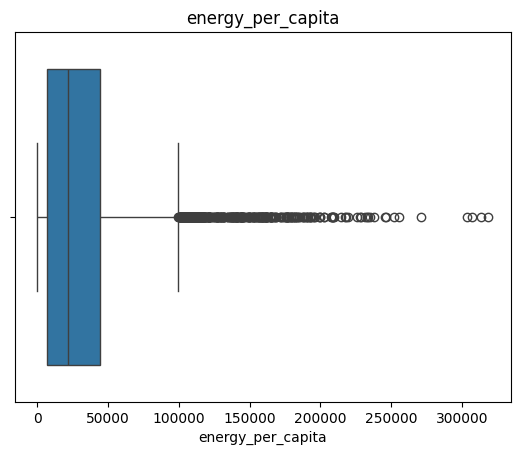

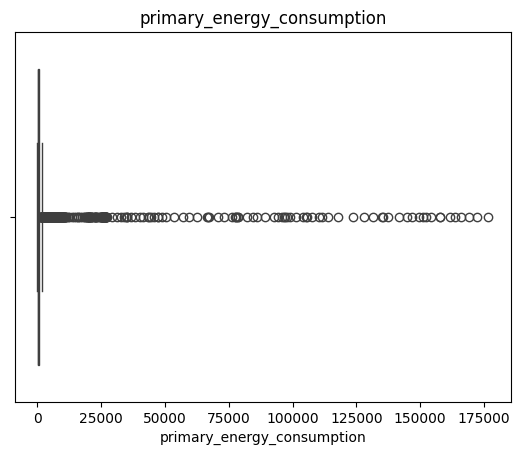

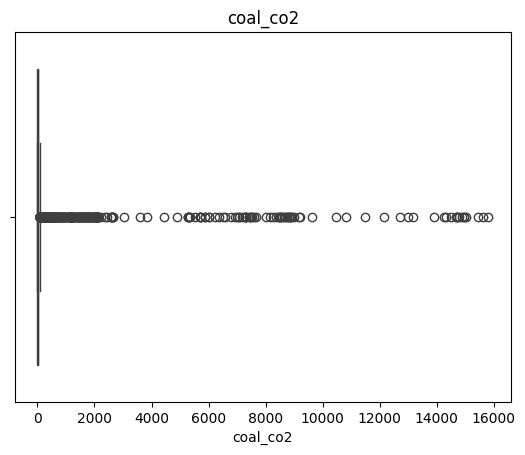

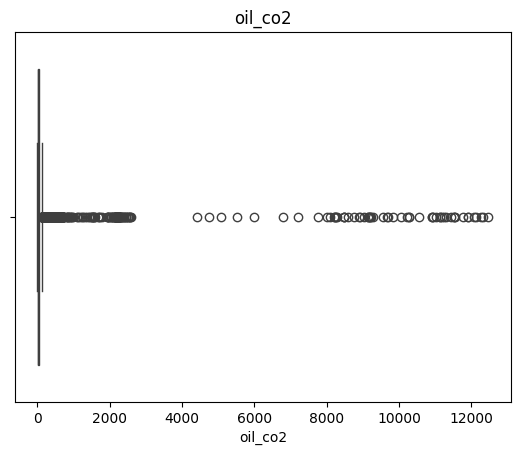

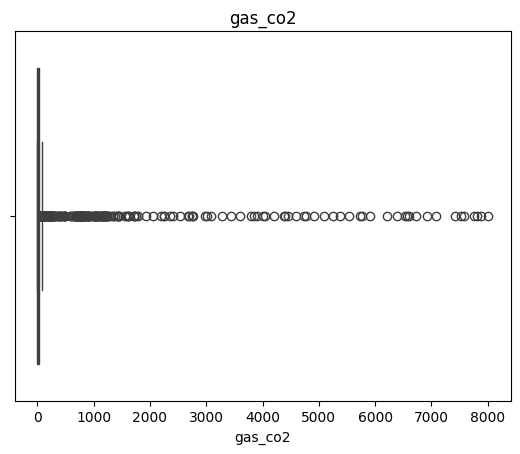

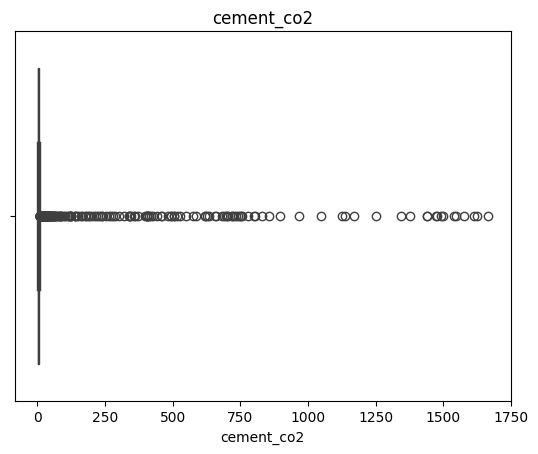

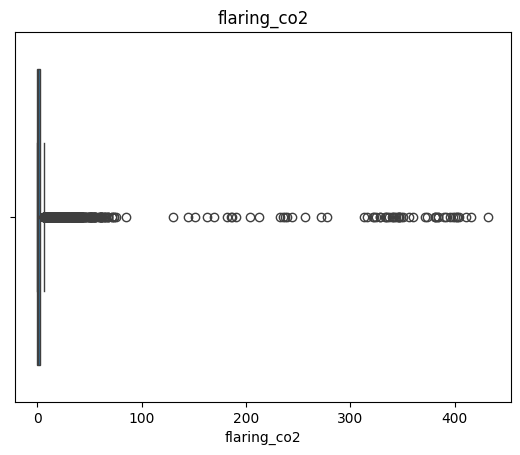

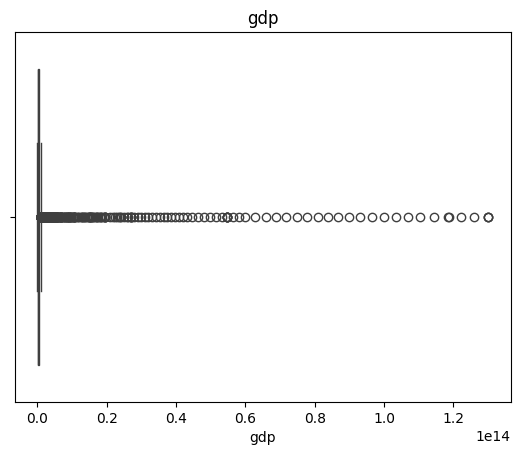

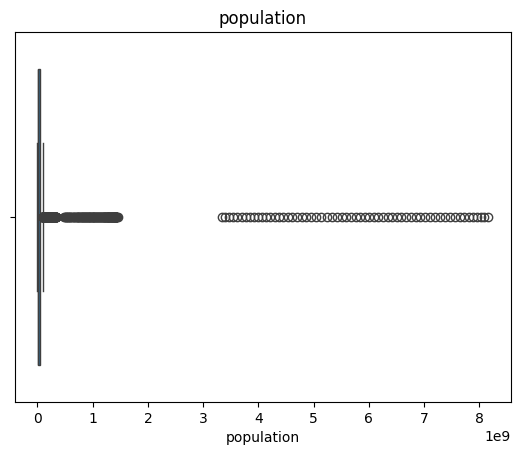

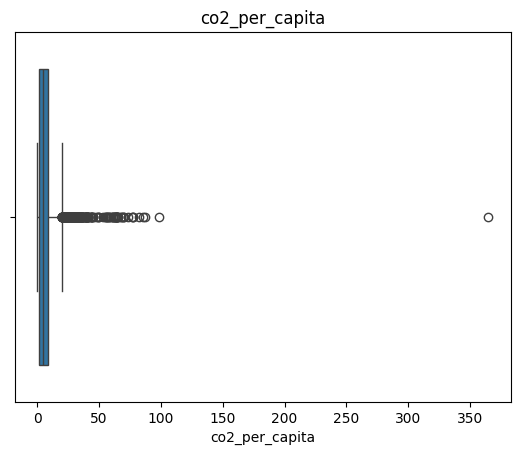

In [31]:
num_cols = [
    "energy_per_capita",
    "primary_energy_consumption",
    "coal_co2",
    "oil_co2",
    "gas_co2",
    "cement_co2",
    "flaring_co2",
    "gdp",
    "population",
    "co2_per_capita"
]

for col in num_cols:
    sns.boxplot(x=df_final[col])
    plt.title(col)
    plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


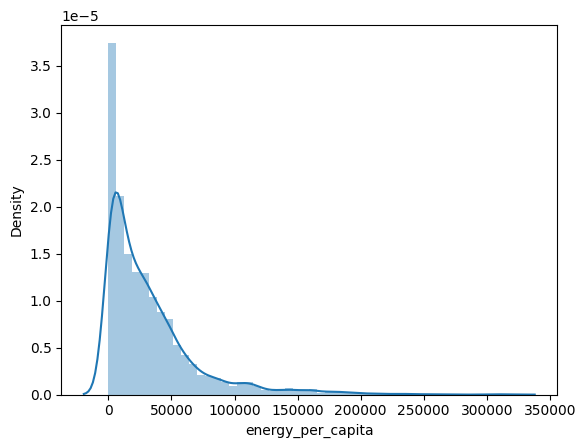

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


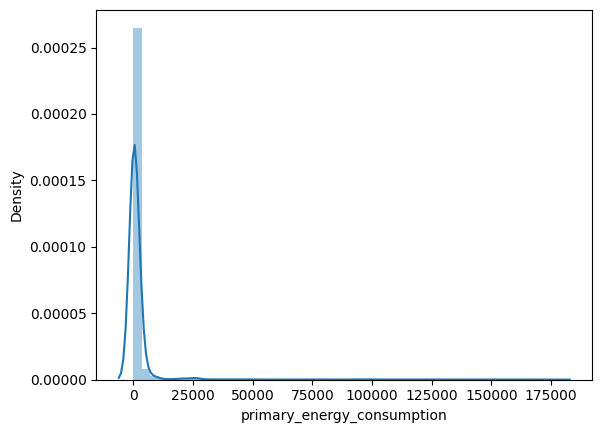

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


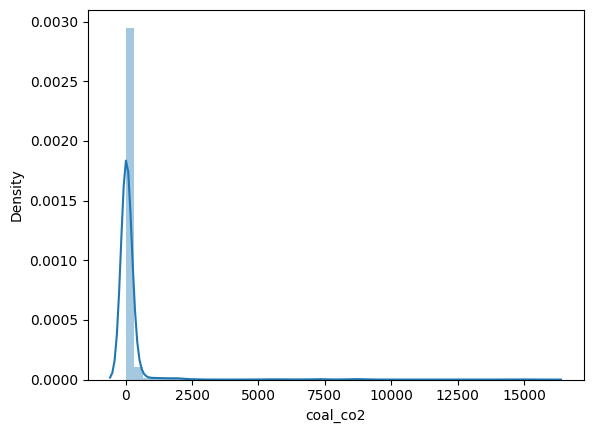

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


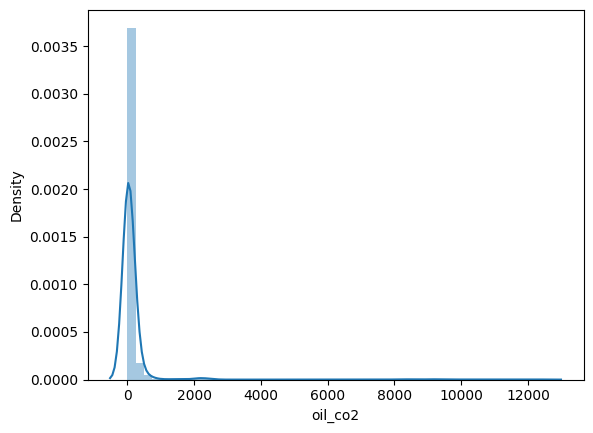

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


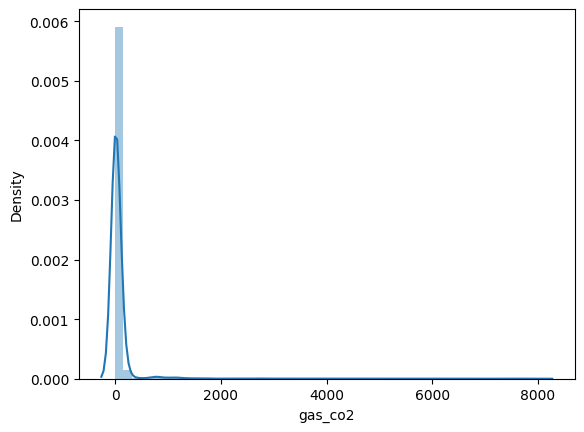

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


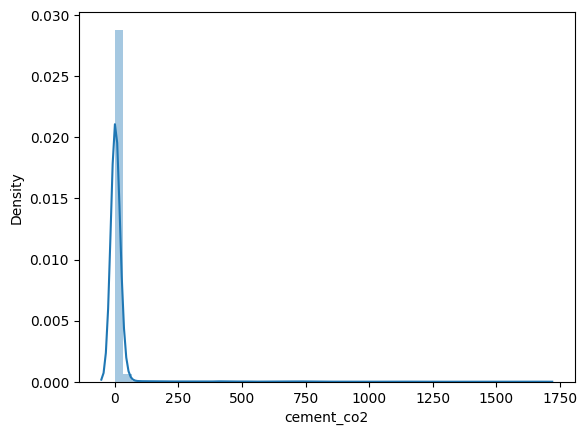

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


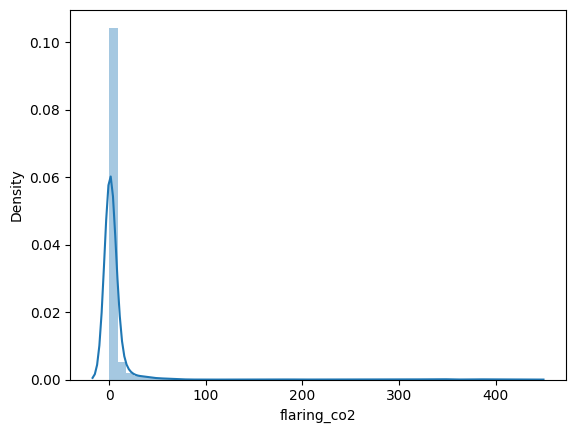

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


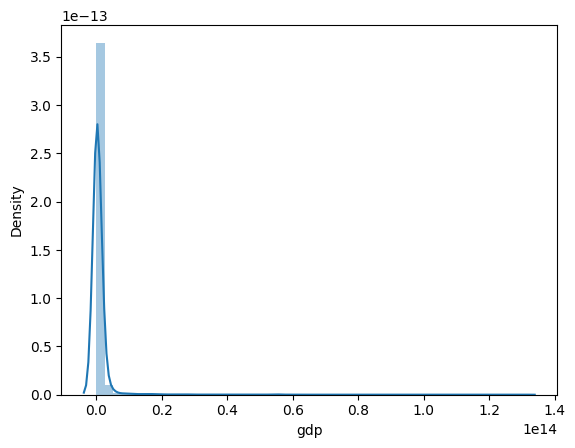

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


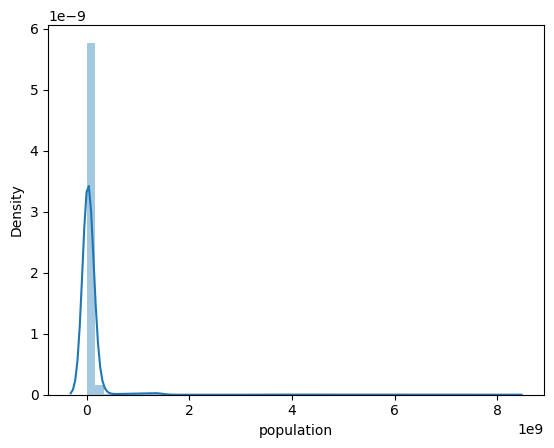

C:\Users\david\AppData\Local\Temp\ipykernel_14112\3531241938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[i])


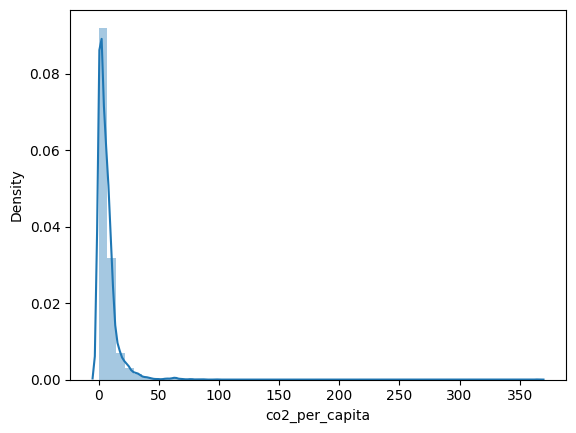

In [32]:
for i in df_final.select_dtypes(include="float64").columns:
    sns.distplot(df_final[i])
    plt.show()

In [43]:
for col in num_cols:
    df_final[col] = np.log1p(df_final[col])


C:\Users\david\AppData\Local\Temp\ipykernel_14112\2133691107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = np.log1p(df_final[col])


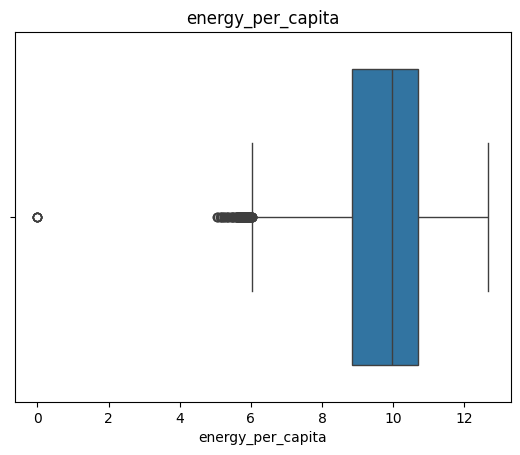

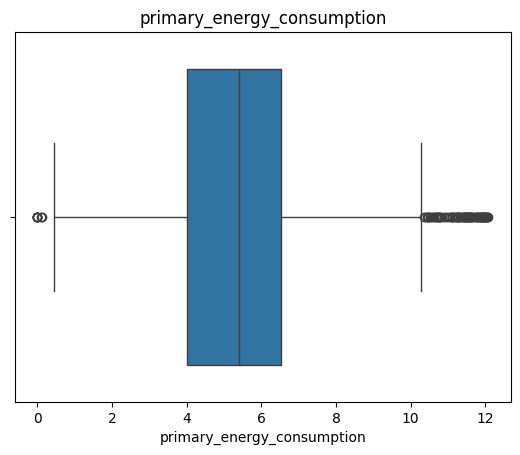

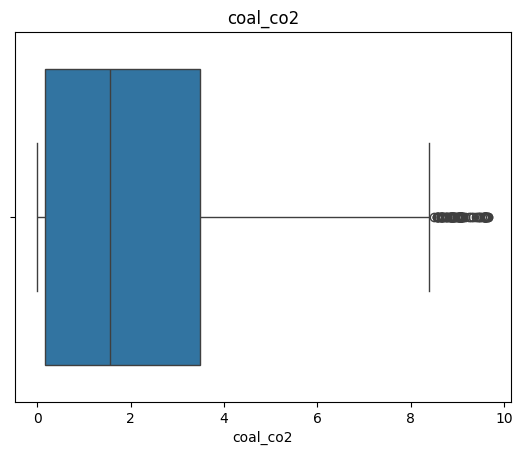

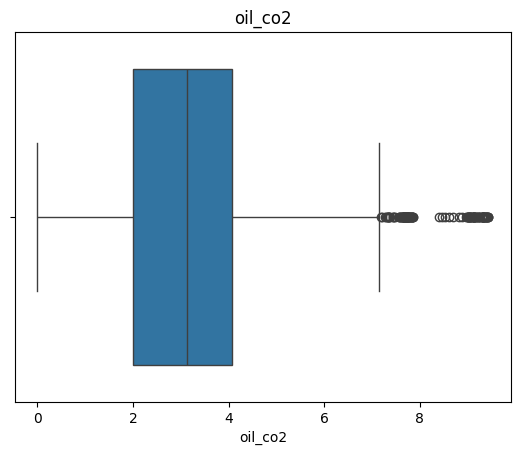

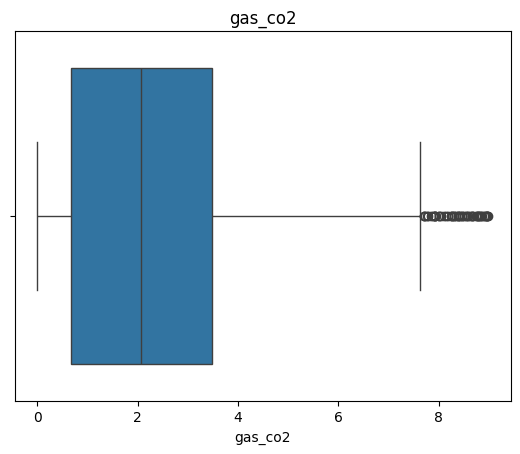

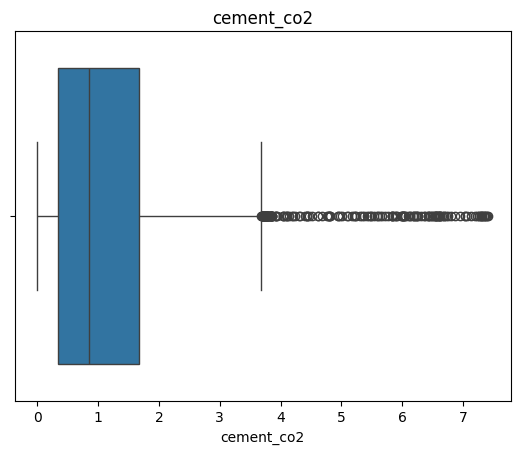

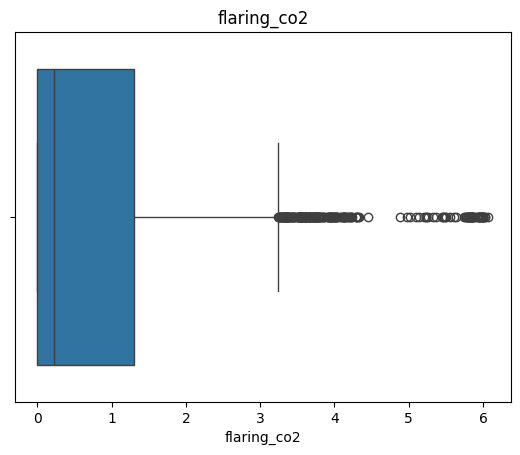

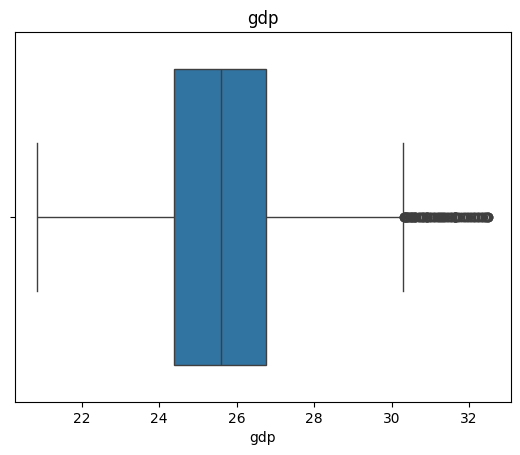

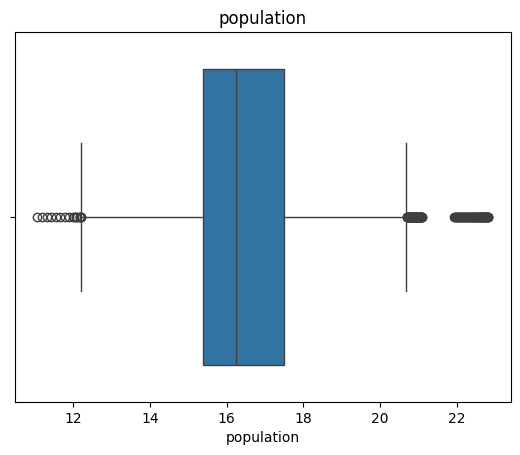

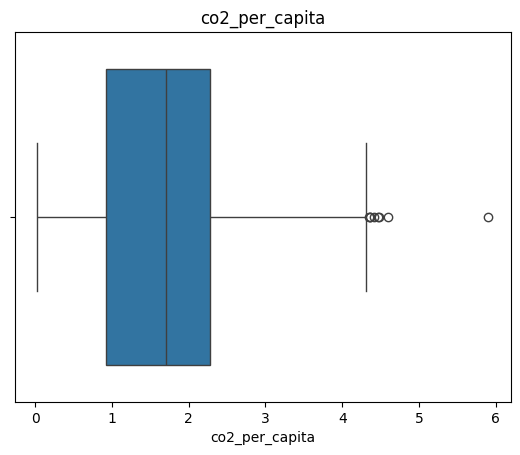

In [44]:
for col in num_cols:
    sns.boxplot(x=df_final[col])
    plt.title(col)
    plt.show() 

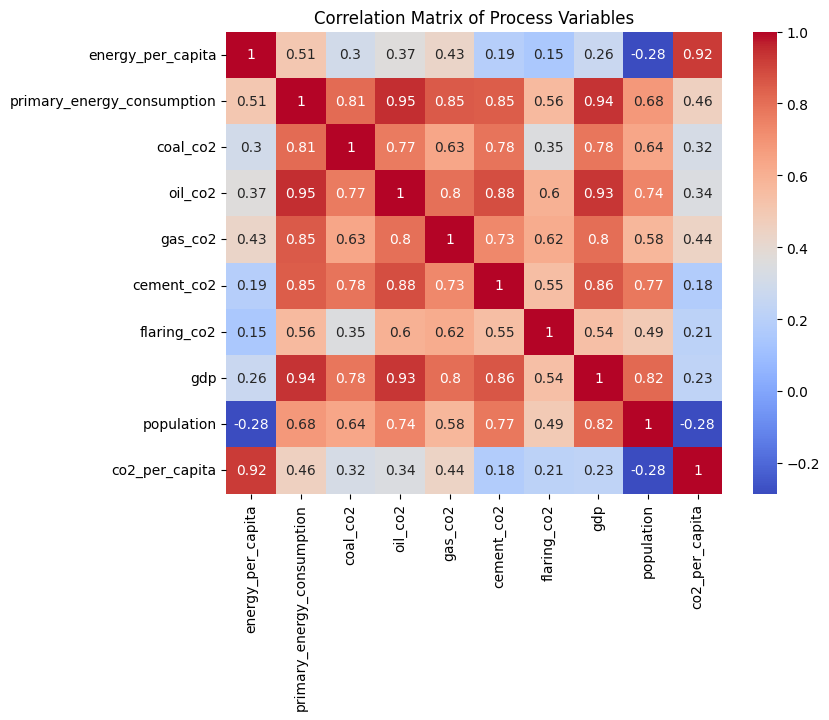

In [45]:
corr = df_final.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Process Variables")
plt.show()

In [ ]:
# ## Modeling Approach

# Three supervised regression models are evaluated:

# 1. **Linear Regression** – baseline model
# 2. **Random Forest Regressor** – non-linear ensemble model
# 3. **Gradient Boosting Regressor** – final model

# Model performance is evaluated using:
# - Root Mean Squared Error (RMSE)
# - Coefficient of Determination (R²)
# #

In [46]:
from sklearn.model_selection import train_test_split

X = df_final[features]
y = df_final["co2_per_capita"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

rmse, r2

(0.3096639820899758, 0.8858934887337029)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [51]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(0.13115586792163814, 0.9795306293423698)

In [57]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

feature_importance

energy_per_capita             0.913323
coal_co2                      0.017893
flaring_co2                   0.016378
population                    0.012658
gas_co2                       0.010053
oil_co2                       0.010040
cement_co2                    0.008357
gdp                           0.007201
primary_energy_consumption    0.004098
dtype: float64

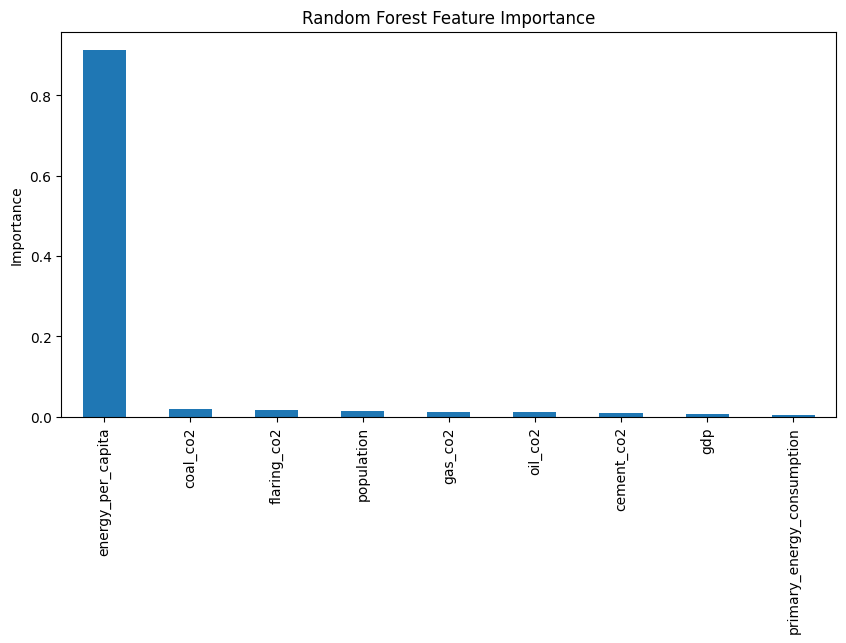

In [58]:
feature_importance.plot(kind="bar", figsize=(10,5))
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

In [60]:
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [63]:
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr

(0.12223845087881925, 0.9822194695284443)

In [64]:
gb_importance = pd.Series(
    gbr.feature_importances_,
    index=features
).sort_values(ascending=False)

gb_importance

energy_per_capita             0.906799
population                    0.021886
flaring_co2                   0.018217
coal_co2                      0.017297
oil_co2                       0.010453
gas_co2                       0.009555
primary_energy_consumption    0.007002
gdp                           0.006216
cement_co2                    0.002576
dtype: float64

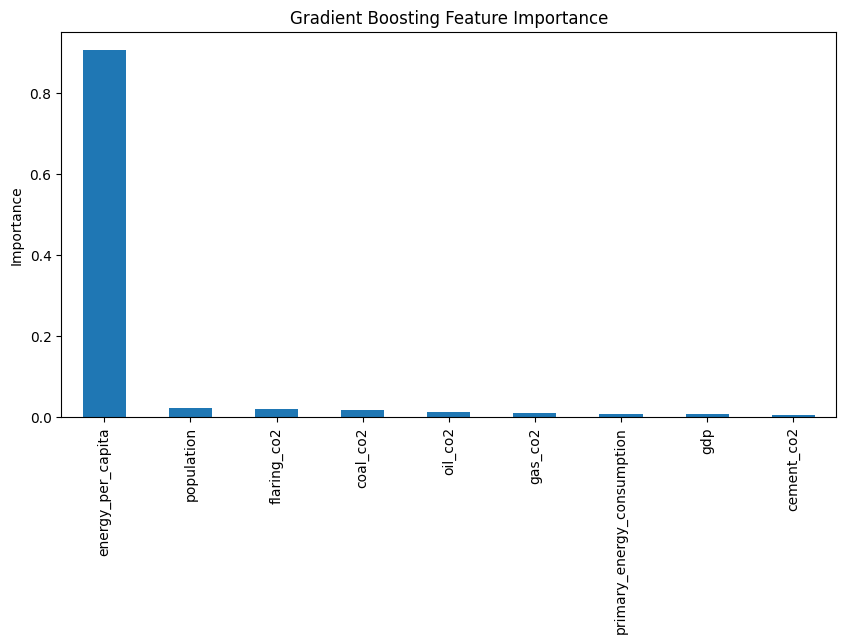

In [65]:
gb_importance.plot(kind="bar", figsize=(10,5))
plt.title("Gradient Boosting Feature Importance")
plt.ylabel("Importance")
plt.show()

In [69]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "RMSE": [rmse, rmse_rf, rmse_gbr],
    "R2": [r2, r2_rf, r2_gbr]
})

results

,Model,RMSE,R2
0,Linear Regression,0.309664,0.885893
1,Random Forest,0.131156,0.979531
2,Gradient Boosting,0.122238,0.982219


In [ ]:
# ## Model Evaluation and Comparison

# Three regression models were evaluated to predict log-transformed CO₂
# emissions per capita: Linear Regression, Random Forest, and Gradient
# Boosting.

# Among these, **Gradient Boosting achieves the best overall performance**,
# significantly outperforming the linear baseline and providing a clear
# improvement over Random Forest. This indicates that carbon intensity is
# governed by strong non-linear relationships that cannot be adequately
# captured by linear models.

# To complement numerical metrics such as RMSE and R², **Predicted vs Actual
# scatter plots** are used to visually assess model accuracy, bias, and
# generalization behavior across the full range of emission values.

# The Gradient Boosting model shows the tightest clustering around the
# ideal 45-degree line, confirming its superior predictive capability and
# minimal systematic bias.


In [70]:
models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gbr
}

predictions = {
    name: model.predict(X_test)
    for name, model in models.items()
}

C:\Users\david\anaconda3\envs\co2_ds\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [71]:
def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    
    plt.scatter(
        y_true, 
        y_pred, 
        alpha=0.4
    )
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot(
        [min_val, max_val], 
        [min_val, max_val], 
        linestyle="--"
    )
    
    plt.xlabel("Actual log(CO₂ per capita)")
    plt.ylabel("Predicted log(CO₂ per capita)")
    plt.title(f"Predicted vs Actual — {model_name}")
    
    plt.tight_layout()
    plt.show()

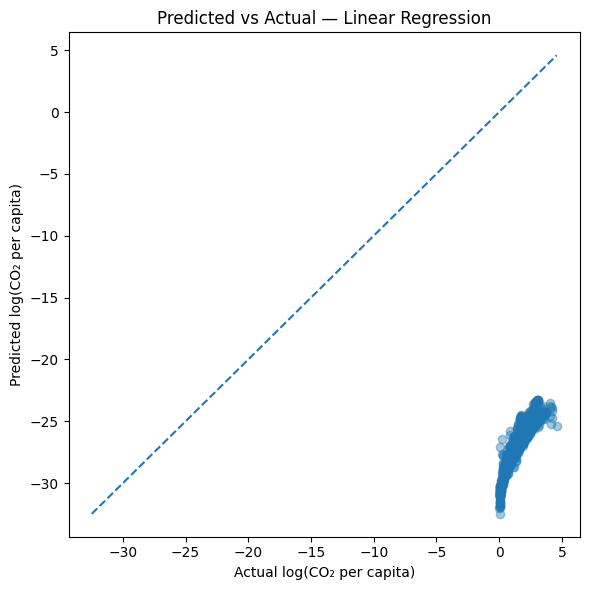

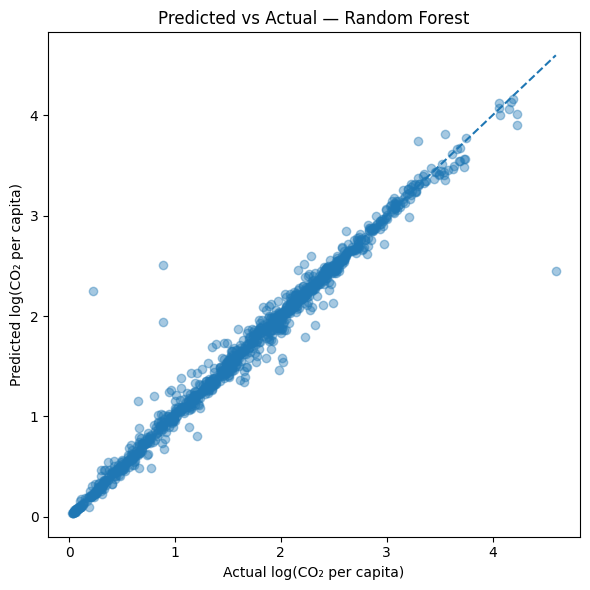

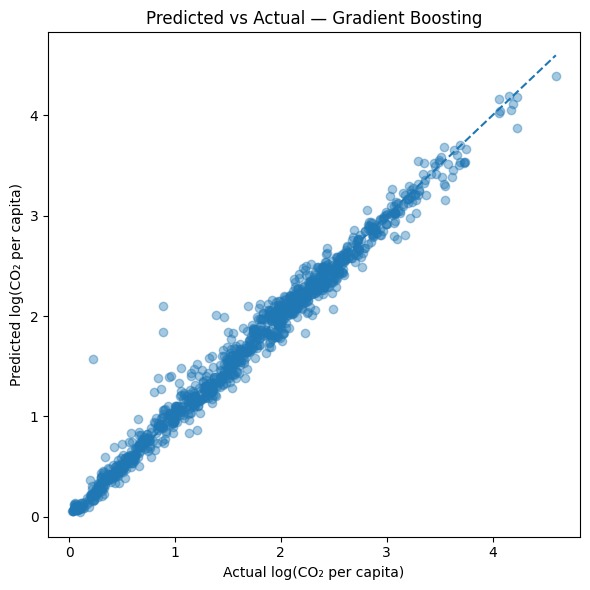

In [72]:
for name, y_pred in predictions.items():
    plot_predicted_vs_actual(y_test, y_pred, name)

In [74]:
pip install shap


  Using cached shap-0.49.1-cp310-cp310-win_amd64.whl.metadata (25 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.63.1-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.46.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
Using cached shap-0.49.1-cp310-cp310-win_amd64.whl (547 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.63.1-cp310-cp310-win_amd64.whl (2.7 MB)
Using cached llvmlite-0.46.0-cp310-cp310-win_amd64.whl (38.1 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.2-py3-none-any.whl (22 kB)

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ------------- -------------------------- 2/6 [llvmlite]
   ------------- -------------------------- 2/6 [llvmlite]
   ------------- -

In [ ]:
# ## Feature Importance and Interpretation

# Feature importance analysis is conducted using the Gradient Boosting
# model, which demonstrated the best predictive performance.

# The analysis reveals that:
# - **Energy consumption per capita** is the dominant driver of carbon
#   intensity, contributing the largest share to model predictions.
# - Fossil fuel–specific emissions, particularly oil-, coal-, and
#   flaring-related CO₂, provide secondary but meaningful contributions.
# - **Population effects** influence emissions by scaling energy demand.
# - **GDP plays a secondary and indirect role**, as much of its influence
#   is already captured through energy consumption patterns.

# These findings are physically and economically consistent with
# established emissions theory, particularly the **Kaya identity**, which
# describes CO₂ emissions as a function of population, economic activity,
# energy use, and carbon intensity of energy.

# The agreement between machine learning interpretations and known
# theoretical relationships supports the robustness and credibility of
# the model.
# #

In [75]:
import shap

In [76]:
explainer = shap.Explainer(gbr, X_train)

In [77]:
shap_values = explainer(X_test)

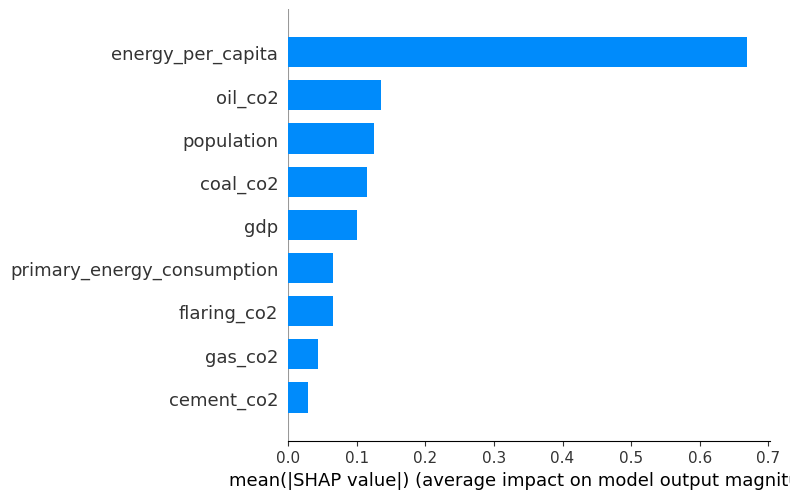

In [78]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

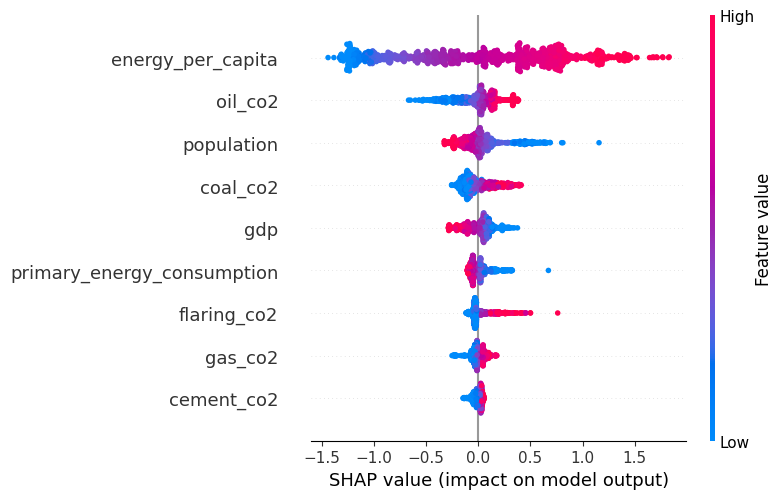

In [79]:
shap.summary_plot(shap_values, X_test)

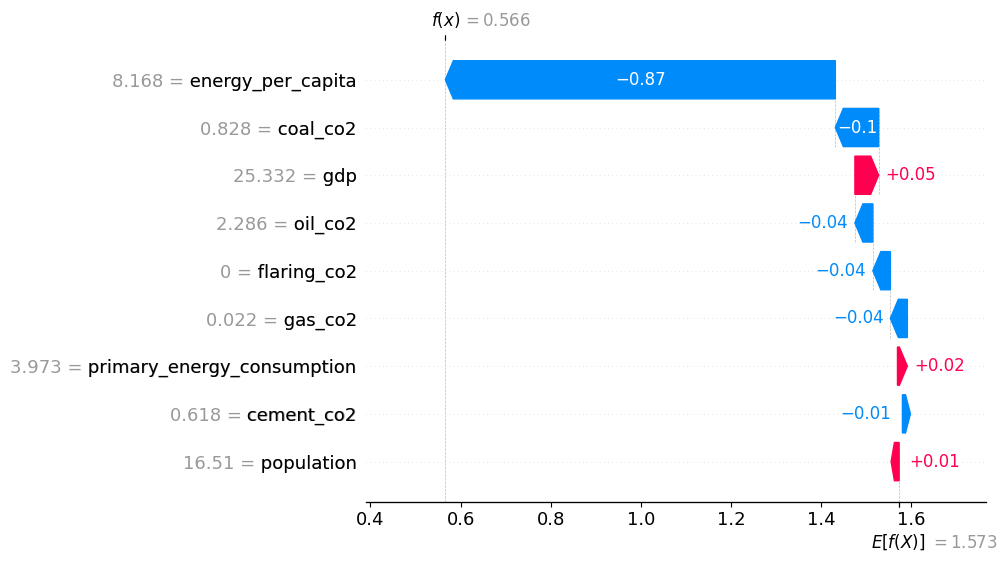

In [80]:
idx = 10-
shap.plots.waterfall(shap_values[idx])

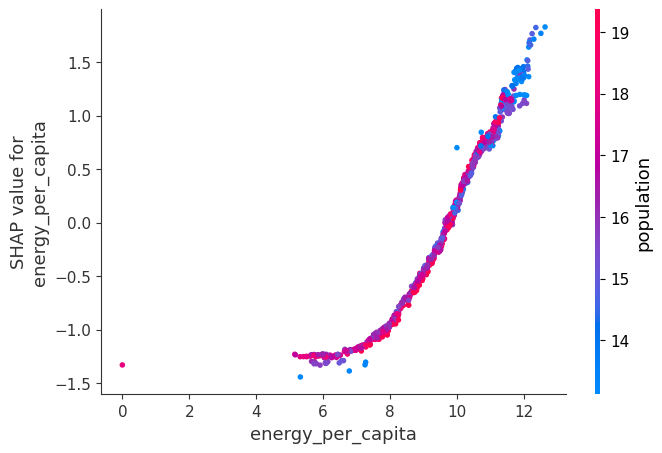

In [81]:
shap.dependence_plot(
    "energy_per_capita",
    shap_values.values,
    X_test
)

In [ ]:
# ## Conclusion and Future Work

# This study demonstrates that **carbon intensity (CO₂ emissions per
# capita) can be accurately modeled using a small set of physically
# meaningful energy and economic indicators**.

# Key conclusions from the analysis are:
# - Energy consumption per capita is the strongest determinant of carbon
#   intensity.
# - Non-linear ensemble models significantly outperform linear regression,
#   highlighting the complex structure of emissions data.
# - Model interpretations are consistent with established physical and
#   economic principles, increasing confidence in the results.

# Overall, the Gradient Boosting model provides a reliable and interpretable
# framework for understanding the key drivers of global carbon intensity.

# Future work may include:
# - Time-series modeling to capture temporal emission dynamics
# - Sector-specific emissions decomposition
# - Scenario analysis for energy transition and climate policy evaluation
